This note book explores the case of customers credit default payments in Taiwan. <br>
Data source: Kaggle<br>
Actvities:
- Data Exploration<br>
- Data Cleaning 


In [89]:
# import libraries
import pandas as pd
import numpy as np
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat
# import library to polot on the same note book
%matplotlib inline

In [90]:
# read the data
df=pd.read_csv('credit_default_train.csv')

In [91]:
# check the first 5 rows
df.head()


,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,male,graduate school,NaN,25,2,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,no
1,200000,male,university,married,54,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,no
2,30000,female,high school,married,-1,2,3,2,2,2,...,30496,29731,29047,0,1700,1100,3,1053,1303,no
3,140000,female,university,single,-1,0,0,0,0,0,...,25224,26855,23783,2000,2000,900,2000,10000,5000,no
4,60000,female,high school,married,36,1,2,2,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,yes


In [92]:
# check the last 5 rows
df.tail()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
9995,50000,female,university,single,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,no
9996,280000,female,university,married,51,2,2,2,2,0,...,218619,201679,195934,25000,7500,0,6500,7000,6000,no
9997,90000,female,university,married,47,0,0,0,0,0,...,28747,29177,29452,2000,2000,2000,2000,2000,2000,no
9998,20000,male,university,married,59,0,0,-1,-1,-1,...,240,390,1320,0,1473,240,540,1320,0,no
9999,280000,female,university,single,35,0,0,0,0,0,...,267359,236734,231064,10028,12500,13106,231064,15004,8004,no


In [93]:
# statistics summary 
df.describe()

,limit,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,ba-sep,ba-aug,ba-jul,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,167197.000000,32.020200,-0.004000,-0.127800,-0.175700,-0.234300,-0.263700,-0.297400,51490.704100,49239.438400,46957.46680,43306.114300,40182.130200,38621.582700,5651.344900,5.973676e+03,5131.898600,4719.769200,4734.702900,5480.147400
std,128975.488596,13.843119,1.132834,1.200921,1.193554,1.169333,1.147386,1.147295,73740.383345,70777.470286,68948.62697,64519.910263,60732.330157,59325.339137,15835.839092,2.251175e+04,15416.402957,14483.407778,14912.375475,19361.411204
min,10000.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-69777.000000,-61506.00000,-24303.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,26.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3545.250000,2899.250000,2442.50000,2203.250000,1650.000000,1150.000000,997.000000,7.800000e+02,390.000000,261.500000,200.000000,100.000000
50%,140000.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22246.000000,21202.000000,19905.50000,19072.000000,18071.000000,16977.000000,2081.500000,2.000000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67681.000000,64412.750000,60164.75000,54093.750000,49906.500000,48680.750000,5019.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,780000.000000,75.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,613860.000000,605943.000000,597415.00000,616836.000000,587067.000000,568638.000000,493358.000000,1.227082e+06,417588.000000,292962.000000,417990.000000,528666.000000


In [94]:
# columns
df.columns

Index(['limit', 'sex', 'education', 'status', 'age', 'ps-sep', 'ps-aug',
       'ps-jul', 'ps-jun', 'ps-may', 'ps-apr', 'ba-sep', 'ba-aug', 'ba-jul',
       'ba-jun', 'ba-may', 'ba-apr', 'pa-sep', 'pa-aug', 'pa-jul', 'pa-jun',
       'pa-may', 'pa-apr', 'credit_default'],
      dtype='object')

In [130]:
# data types
df.dtypes

limit              int64
sex               object
education         object
status            object
age                int64
ps-sep             int64
ps-aug             int64
ps-jul             int64
ps-jun             int64
ps-may             int64
ps-apr             int64
ba-sep             int64
ba-aug             int64
ba-jul             int64
ba-jun             int64
ba-may             int64
ba-apr             int64
pa-sep             int64
pa-aug             int64
pa-jul             int64
pa-jun             int64
pa-may             int64
pa-apr             int64
credit_default    object
dtype: object

In [95]:
# count 
df['sex'].count()

9900

In [96]:
# avg age
df['age'].mean()

32.0202

In [97]:
# average age
df['age'].sum()/ len(df['age'])

32.0202

In [98]:
# gender distribution
df['sex'].value_counts()

female    6032
male      3868
Name: sex, dtype: int64

In [99]:
# average limit
df['limit'].mean()

167197.0

In [100]:
# distribtion per education
df['education'].value_counts()

university         4685
graduate school    3480
high school        1672
others               36
Name: education, dtype: int64

In [101]:
# distribution per status
# group by status
df['status'].value_counts()

single     4346
married    3757
others       75
Name: status, dtype: int64

In [102]:
# credit default?
df['credit_default'].value_counts()

no     7788
yes    2212
Name: credit_default, dtype: int64

### Distribution Graphs

<AxesSubplot:>

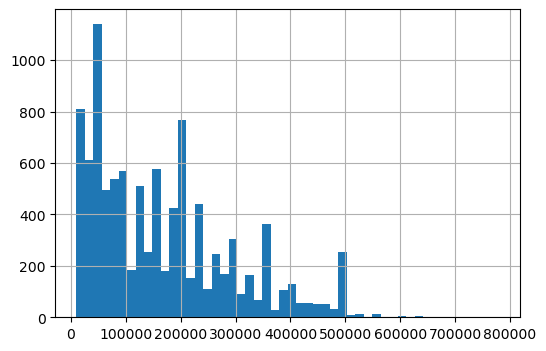

In [103]:
# Numerical distribution for limit, to look for extreme values
df['limit'].hist(bins=50,figsize=(6,4))

<AxesSubplot:ylabel='Frequency'>

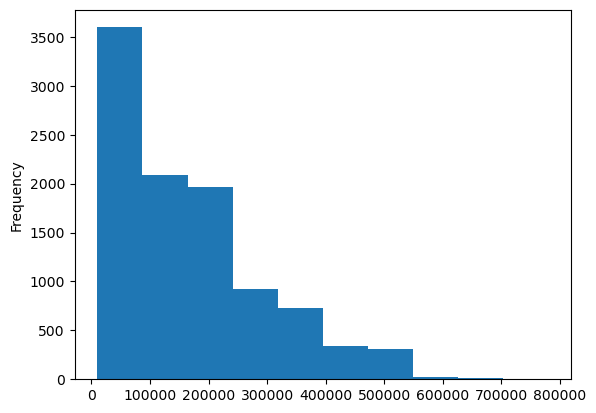

In [104]:
df['limit'].plot(kind='hist', bins=10)

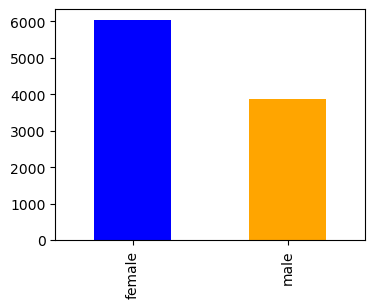

In [105]:
# group by sex
color_list= ['blue', 'orange']
df['sex'].value_counts().plot(kind='bar',color=color_list,figsize=(4,3))
plt.show()

<AxesSubplot:>

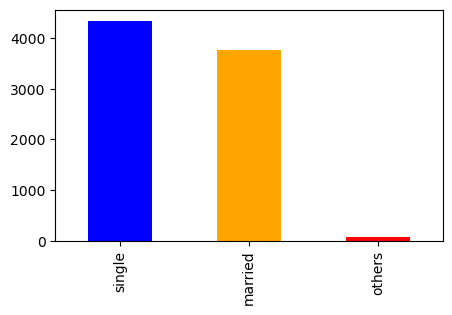

In [108]:
# group by Marital satus
color_list= ['blue', 'orange','red']
df['status'].value_counts().plot(kind='bar',color=color_list,figsize=(5,3))

<AxesSubplot:ylabel='Frequency'>

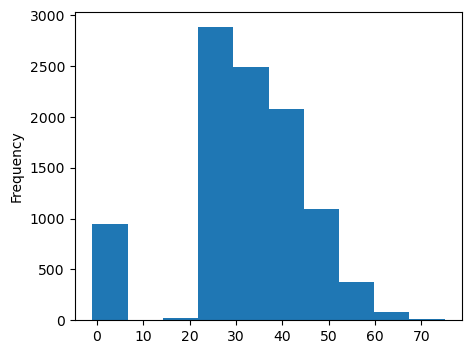

In [113]:
df['age'].plot(kind='hist', bins=10,figsize=(5,4))

<AxesSubplot:>

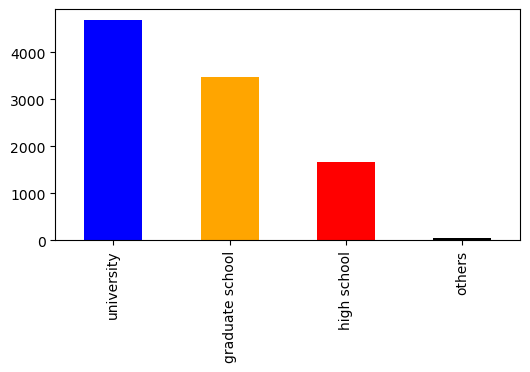

In [115]:
# group by education
color_list= ['blue', 'orange','red','black']
df['education'].value_counts().plot(kind='bar',color=color_list,figsize=(6,3))

### Columns unique values check

In [116]:
# ps-sep column unique values 
Psep= df['ps-sep'].unique().tolist()
Psep.sort()
print(Psep)

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [117]:
# unique value for the column , 8
Paug=df['ps-aug'].unique()
Paug.sort()
print(Paug)


[-2 -1  0  1  2  3  4  5  6  7]


In [118]:
Pjuly=df['ps-jul'].unique()
Pjuly.sort()
print(Pjuly)

[-2 -1  0  1  2  3  4  5  6  7  8]


In [119]:
Pjune= df['ps-jun'].unique()
Pjune.sort()
print(Pjune)

[-2 -1  0  2  3  4  5  6  7  8]


In [120]:
Pmay= df['ps-may'].unique()
Pmay.sort()
print(Pmay)

[-2 -1  0  2  3  4  5  6  7  8]


In [121]:
Papr= df['ps-apr'].unique()
Papr.sort()
print(Papr)

[-2 -1  0  2  3  4  5  6  7  8]


In [122]:
df['credit_default'].unique()

array(['no', 'yes'], dtype=object)

In [123]:
age= df['age'].unique().tolist()
age.sort()
print(age)

[-1, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75]


In [128]:
df['age'].dtypes

dtype('int64')

In [138]:
# num of records age = -1
df[(df.age == -1)]['age'].count()

951

In [139]:
limit= df['limit'].unique().tolist()
limit.sort()
print(limit)

[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 340000, 350000, 360000, 370000, 380000, 390000, 400000, 410000, 420000, 430000, 440000, 450000, 460000, 470000, 480000, 490000, 500000, 510000, 520000, 530000, 540000, 550000, 560000, 570000, 580000, 590000, 600000, 610000, 620000, 630000, 640000, 650000, 660000, 680000, 700000, 710000, 740000, 750000, 780000]


In [140]:
bajuly = df['ba-jul'].unique().tolist()
bajuly.sort()
print(bajuly)

[-61506, -24702, -15910, -15000, -11035, -10951, -10922, -10608, -7772, -6674, -6042, -5738, -4661, -4620, -4291, -3764, -3699, -3650, -3626, -3484, -2811, -2640, -2601, -2506, -2429, -2400, -2241, -2113, -2000, -1917, -1868, -1801, -1800, -1690, -1659, -1581, -1580, -1523, -1500, -1466, -1404, -1360, -1294, -1282, -1248, -1037, -1024, -1001, -978, -959, -948, -928, -915, -910, -897, -874, -850, -830, -829, -807, -792, -789, -781, -780, -760, -738, -720, -718, -600, -571, -564, -563, -551, -512, -488, -484, -482, -433, -408, -390, -387, -378, -350, -348, -342, -324, -320, -301, -290, -288, -286, -241, -240, -229, -214, -211, -207, -200, -199, -191, -176, -150, -144, -127, -125, -117, -116, -104, -101, -100, -95, -77, -74, -73, -72, -70, -65, -60, -55, -52, -50, -48, -46, -43, -41, -40, -37, -35, -33, -31, -29, -27, -26, -25, -24, -22, -21, -19, -18, -17, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 3, 10, 12, 15, 19, 23, 31, 65, 66, 70, 78, 81, 84, 88, 92, 98

In [141]:
bajune = df['ba-jun'].unique().tolist()
bajune.sort()
print(bajune)

[-24303, -15910, -15588, -15000, -10433, -8758, -7772, -7511, -6867, -5738, -5513, -5364, -4620, -4291, -3772, -3684, -3650, -3484, -2897, -2800, -2506, -2490, -2176, -2113, -2000, -1944, -1917, -1878, -1868, -1796, -1776, -1580, -1523, -1518, -1500, -1469, -1438, -1397, -1391, -1373, -1307, -1300, -1217, -1170, -1037, -1018, -1001, -1000, -959, -915, -897, -885, -884, -874, -829, -824, -807, -792, -760, -736, -649, -620, -602, -601, -600, -570, -561, -515, -513, -512, -500, -488, -484, -482, -473, -470, -448, -442, -440, -434, -387, -367, -356, -350, -342, -324, -320, -301, -300, -288, -286, -261, -254, -250, -243, -241, -240, -229, -220, -214, -210, -207, -200, -192, -191, -176, -150, -144, -139, -129, -119, -110, -108, -100, -96, -83, -77, -73, -72, -65, -55, -52, -51, -50, -46, -45, -43, -41, -40, -39, -37, -36, -35, -33, -32, -27, -26, -25, -23, -22, -20, -19, -18, -16, -15, -14, -12, -11, -10, -9, -8, -6, -5, -4, -3, -2, -1, 0, 3, 5, 11, 12, 14, 18, 19, 26, 30, 31, 41, 45, 52, 53

In [142]:
bamay = df['ba-may'].unique().tolist()
bamay.sort()
print(bamay)

[-81334, -61372, -37594, -30481, -20254, -19205, -15000, -10810, -8943, -8692, -8074, -6332, -6159, -5857, -5820, -5738, -4618, -4430, -4291, -4082, -4020, -3830, -3650, -3484, -3237, -2506, -2333, -2132, -2113, -2056, -2000, -1953, -1917, -1868, -1773, -1591, -1580, -1523, -1518, -1438, -1381, -1300, -1282, -1231, -1228, -1203, -1197, -1184, -1169, -1121, -959, -915, -905, -897, -876, -874, -832, -829, -796, -792, -783, -772, -765, -712, -669, -658, -649, -600, -585, -570, -527, -508, -500, -488, -440, -434, -387, -367, -360, -350, -339, -335, -324, -320, -309, -302, -301, -300, -295, -288, -286, -261, -245, -243, -241, -240, -235, -232, -229, -220, -217, -200, -191, -177, -176, -175, -150, -144, -142, -129, -127, -120, -114, -110, -100, -96, -95, -73, -72, -65, -60, -56, -55, -52, -51, -50, -47, -46, -45, -43, -41, -40, -39, -37, -33, -32, -30, -28, -25, -23, -22, -20, -19, -18, -16, -15, -12, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 12, 15, 18, 19, 20, 22, 38, 46, 53, 66, 70, 

In [143]:
baapril = df['ba-apr'].unique().tolist()
baapril.sort()
print(baapril)

[-209051, -150953, -57060, -45734, -24920, -23670, -21295, -15296, -15000, -10193, -9333, -8026, -6159, -6053, -5820, -5813, -5738, -5459, -4543, -4291, -4220, -4082, -3650, -3140, -3000, -2988, -2879, -2701, -2506, -2313, -2303, -2175, -2113, -2047, -2000, -1868, -1773, -1580, -1531, -1518, -1514, -1500, -1465, -1429, -1382, -1300, -1282, -1280, -1269, -1228, -1180, -1087, -1070, -1037, -1005, -1000, -969, -963, -959, -913, -905, -897, -832, -829, -825, -796, -786, -783, -772, -741, -649, -607, -600, -591, -587, -579, -554, -510, -500, -488, -486, -445, -440, -434, -421, -370, -367, -363, -350, -345, -336, -335, -334, -325, -320, -311, -309, -304, -301, -300, -295, -286, -261, -246, -245, -243, -240, -235, -229, -216, -206, -200, -181, -177, -176, -174, -173, -150, -127, -125, -121, -120, -116, -114, -110, -108, -105, -101, -96, -89, -87, -77, -73, -72, -56, -55, -52, -51, -46, -45, -43, -41, -38, -36, -34, -33, -32, -31, -30, -28, -25, -24, -23, -19, -18, -16, -15, -13, -12, -10, -9,

In [144]:
pasep = df['pa-sep'].unique().tolist()
pasep.sort()
print(pasep)

[0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 22, 24, 25, 26, 27, 28, 29, 31, 33, 39, 40, 44, 50, 51, 57, 69, 70, 75, 79, 80, 92, 95, 99, 100, 101, 102, 104, 105, 107, 109, 121, 125, 129, 132, 135, 138, 140, 141, 144, 146, 150, 151, 154, 159, 162, 165, 166, 168, 169, 172, 174, 176, 177, 179, 187, 188, 192, 195, 198, 199, 200, 203, 205, 206, 207, 209, 212, 213, 220, 225, 226, 228, 232, 233, 241, 245, 248, 250, 253, 255, 256, 258, 259, 262, 264, 268, 271, 273, 278, 280, 282, 283, 285, 286, 291, 297, 299, 300, 303, 306, 307, 310, 311, 312, 316, 318, 319, 322, 323, 325, 326, 327, 329, 330, 331, 333, 336, 340, 341, 342, 344, 345, 350, 354, 355, 357, 358, 360, 363, 365, 372, 377, 380, 381, 384, 389, 390, 392, 393, 394, 395, 396, 399, 401, 403, 404, 412, 415, 416, 419, 420, 427, 428, 429, 430, 434, 435, 438, 439, 440, 444, 447, 455, 468, 469, 472, 477, 478, 479, 482, 484, 487, 492, 495, 498, 499, 500, 501, 505, 507, 509, 510, 512, 513, 515, 524, 533, 534, 546, 550, 552, 555, 55

In [145]:
paaugust = df['pa-aug'].unique().tolist()
paaugust.sort()
print(paaugust)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 28, 30, 31, 34, 37, 39, 47, 48, 49, 60, 65, 70, 74, 84, 85, 92, 98, 99, 100, 103, 106, 107, 120, 126, 132, 134, 138, 150, 152, 156, 157, 158, 159, 163, 164, 165, 166, 173, 174, 176, 178, 179, 181, 183, 184, 187, 188, 189, 190, 195, 197, 198, 199, 200, 203, 206, 207, 210, 213, 216, 217, 220, 222, 225, 226, 229, 234, 246, 248, 249, 250, 252, 258, 261, 264, 267, 268, 270, 271, 274, 282, 285, 289, 291, 297, 300, 307, 308, 316, 318, 319, 320, 321, 322, 325, 326, 328, 329, 330, 331, 332, 335, 342, 343, 344, 350, 352, 355, 359, 360, 365, 367, 368, 369, 371, 372, 375, 376, 377, 380, 381, 382, 388, 389, 390, 392, 396, 397, 398, 399, 400, 401, 402, 403, 409, 411, 415, 416, 419, 420, 421, 430, 431, 432, 433, 435, 436, 437, 438, 440, 441, 443, 444, 446, 450, 456, 460, 464, 467, 472, 474, 478, 480, 481, 485, 486, 488, 490, 496, 497, 498, 499, 500, 501, 502, 504, 505, 508, 510, 517, 521, 526, 528, 530, 538, 53

In [146]:
paapril = df['pa-apr'].unique().tolist()
paapril.sort()
print(paapril)

[0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 13, 16, 17, 18, 21, 22, 23, 27, 28, 29, 33, 36, 37, 38, 42, 45, 48, 50, 52, 55, 56, 57, 60, 61, 63, 66, 68, 69, 70, 71, 74, 77, 80, 81, 85, 91, 95, 97, 100, 102, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 126, 130, 131, 134, 135, 137, 138, 139, 143, 148, 150, 151, 152, 154, 156, 158, 159, 160, 163, 164, 165, 167, 168, 170, 173, 177, 178, 179, 180, 181, 182, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 209, 210, 212, 214, 215, 218, 220, 221, 223, 230, 231, 235, 236, 238, 239, 240, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258, 264, 266, 267, 268, 273, 275, 276, 277, 278, 280, 283, 284, 286, 287, 288, 289, 290, 291, 293, 295, 297, 299, 300, 301, 303, 304, 306, 307, 308, 312, 314, 316, 318, 319, 321, 322, 323, 324, 325, 326, 330, 331, 333, 334, 335, 340, 341, 342, 344, 345, 348, 349, 350, 351, 352, 354, 357, 359, 360, 361, 363, 364, 369, 370, 373, 375, 376, 3

### Missing value - age and sex,limit, education, status

In [147]:
df['age'].isnull().sum()

0

In [148]:
df['sex'].isnull().sum()

100

In [149]:
df['limit'].isnull().sum()

0

In [150]:
df['education'].isnull().sum()

127

In [151]:
df['status'].isnull().sum()

1822

### Remove records having null value 

In [180]:
df1 = df.dropna(how='any', axis=0).copy()

### Look for null values

In [181]:
df1.isnull().sum()

limit             0
sex               0
education         0
status            0
age               0
ps-sep            0
ps-aug            0
ps-jul            0
ps-jun            0
ps-may            0
ps-apr            0
ba-sep            0
ba-aug            0
ba-jul            0
ba-jun            0
ba-may            0
ba-apr            0
pa-sep            0
pa-aug            0
pa-jul            0
pa-jun            0
pa-may            0
pa-apr            0
credit_default    0
dtype: int64

### Drop record with age = -1

In [182]:
# total # records with age = -1
df1[(df1.age == -1)]['age'].count()

780

In [183]:
# total num of recors 
df1.shape[0]

7993

In [189]:
# drop record with age= -1
df_clean = df1[(df1.age != -1)]

In [190]:
df_clean = df_clean.copy()

In [191]:
#check if the rows are removed
df_clean.shape[0]

7213

### Drived columns

In [192]:
df_clean['status'].value_counts()

single     3837
married    3309
others       67
Name: status, dtype: int64

In [201]:
#Creating a new column based on sex and status
df_clean['sex status']= df_clean.sex.map(str)+ " " + df_clean.status

In [202]:
df_clean['sex status'].value_counts()

female single     2279
female married    2040
male single       1558
male married      1269
female others       38
male others         29
Name: sex status, dtype: int64

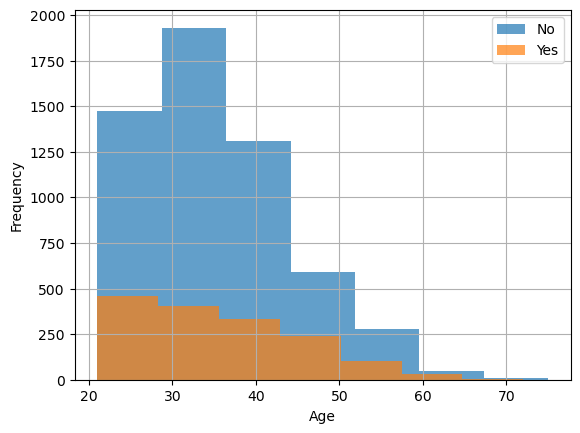

In [207]:
# Histogram age grouped by credit default
max_age = max(df_clean['age'])
df_clean[df_clean['credit_default'] == 'no']['age'].hist(bins= int(max_age / 10), label='No', alpha=0.7)
df_clean[df_clean['credit_default'] == 'yes']['age'].hist(bins = int(max_age / 10) , label = 'Yes' , alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()





